# Network Dynamics

A Network or an undirected graph is a set of nodes $a_i$ where $0<i\le N \in \mathbb{N}$ and the set of edges between these nodes which is usually represented by an Adjacency Matrix $A^{N \times N}$. $A_{ij} = 1$ if $a_i$ and $a_j$ are connected by an edge and $A_{ij} = 0$ otherwise. We can use either matrix manipulation or we can use the 'networkx' library to create some graphs and network shapes. 

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from numpy import linalg as la
from networkx import grid_graph
import random
import collections

### Creating Networks

We can create an adjacency matrix by hand as follows :

In [2]:
A = np.array([[0, 1, 1, 1, 1],
              [1, 0, 1 ,0, 0],
              [1, 1, 0 ,1, 0],
              [1, 0, 1 ,0, 0],
              [1, 0, 0 ,0, 0]])

Now we can construct a graph object from this adjacency matrix and display in graph form:

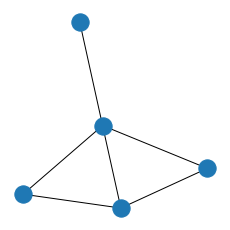

In [3]:
plt.figure(figsize=(3,3))
G = nx.from_numpy_matrix(A)
nx.draw(G)

### Random Networks

A Random Graph (or Erdös-Renyi Graph) is a graph such that during its construction, the probability of placing an edge between any two nodes is constant. We can formalize this as: $ \forall i,j$, the probability $P(A_{ij}=1)=p$ for some probability $p \in [0,1]$. We can construct a random network with the following code:

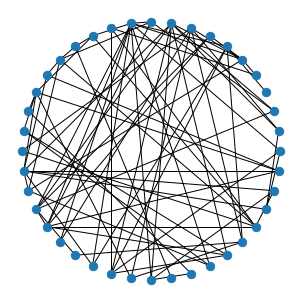

In [4]:
# Random Network Function 
def RandomGraph(N,p):
    A = np.zeros(shape = (N,N))
    for i in range(0, N):
        for j in range(0,i):
            if(random.random()<=p):
                A[i,j]=1
                A[j,i]=1
    return A

# Creating and displaying a Random Network
RG = RandomGraph(40,0.1)
RGX = nx.from_numpy_array(RG)
plt.figure(figsize=(4,4)) 
nx.draw(RGX, nx.circular_layout(RGX), node_size=70)
plt.show()

Note that not all random graphs are connected. We can confirm this visually or use the following method to check

In [5]:
Connected = nx.is_connected(RGX)
print('Connected :', Connected)

Connected : True


We can also see the degree distribution of this random graph using:

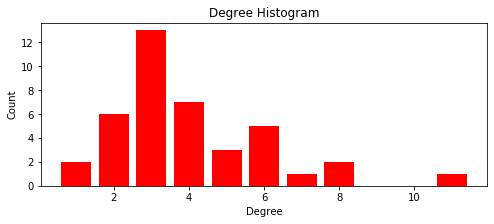

In [6]:
degree_sequence = sorted([d for n, d in RGX.degree()], reverse=True) 
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())
plt.figure(figsize=(8,3)) 
plt.bar(deg, cnt, width=0.80, color='r')
plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
plt.show()

### Watts-Strogatz Networks

Watts-Strogatz Networks can be directly created using 'networkx' methods, but we can also write our own function. We can start with a 2k-Regular network also known as a Ring Lattice and rewire the connections with a given fixed probability $\beta$.

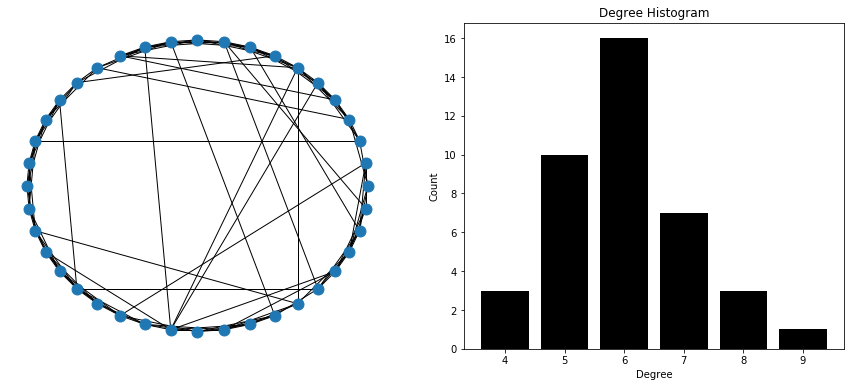

In [7]:
def RingLattice(N, k):
    A = np.zeros(shape = (N,N))
    for i in range(N):
        for j in range(1,k+1):
            A[i,(i+j)%N], A[(i+j)%N,i] = 1, 1
            A[i,(i-j)%N], A[(i-j)%N,i] = 1, 1   
    return A

def WSGraph (N, k, beta):
    A = RingLattice(N, k)
    for i in range(N):
        for j in range(N):
            if ((A[i,j]) and (random.random()<beta)):
                A[i,i] = 1
                new = random.choice(np.where(A[i,:] == 0)[0])
                A[i,new], A[new,i] = 1, 1
                A[i,j], A[j,i], A[i,i] = 0, 0, 0
    return A

# Creating and displaying a WS Network and Degree Distribution
WS = WSGraph(40, 3, 0.1)
WSX = nx.from_numpy_array(WS)
degree_sequence = sorted([d for n, d in WSX.degree()], reverse=True) 
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

plt.figure(figsize=(15,6))
plt.subplot(121)
nx.draw(WSX, nx.circular_layout(WSX), node_size=120)
plt.subplot(122)
plt.bar(deg, cnt, width=0.80, color='k')
plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
plt.show()

### Other Types of Networks
A Regular graph is a graph such that $\forall i, \text{Degree}(a_i) = k$ for some $k<N$. In other words, a Regular graph has uniform degree distribution. We can use networkx constructors to create regular graphs and other commonly used networks such as $N$-Dimensional grids and Barabasi-Albert Networks.

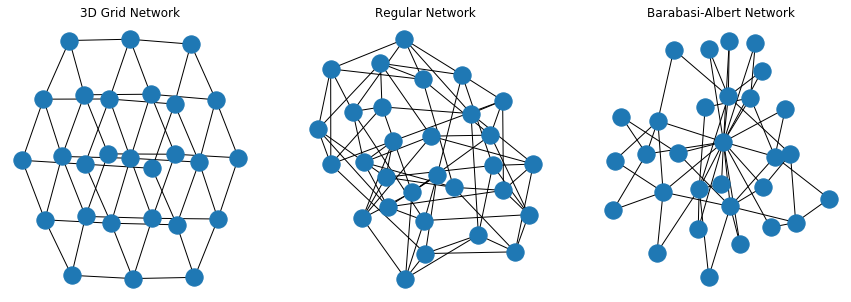

In [8]:
G_Grid3D = nx.grid_graph(dim=[3,3,3])
G_BA = nx.barabasi_albert_graph(30, 2)
G_Regular = nx.random_regular_graph(5, 30)

plt.figure(figsize=(15,5))
plt.subplot(131).title.set_text('3D Grid Network')
nx.draw(G_Grid3D)
plt.subplot(132).title.set_text('Regular Network')
nx.draw(G_Regular)
plt.subplot(133).title.set_text('Barabasi-Albert Network')
nx.draw(G_BA)

## Non-Linear Synchronization over Networks

Now we will simulate Lorenz systems coupled using a network structure with adjacency matrix $A$. In this case, we can describe the dynamics with:<br>
\begin{aligned}
\mathbf{\dot{x}}_i = \mathbf{f}(\mathbf{x}_i) - \alpha \sum_{j=1}^N L_{ij} \mathbf{H}(x_j)
\end{aligned}
where $L$ is the Laplacian of the Adjacency Matrix which is defined by $L_{ij}=\delta_{ij}-A_{ij}$ for $1 \le i,j \le N$. If we make the assumption that nodes are not self connected i.e. $A_{ij} = 0$ if $i=j$.

We can start by describing a network and validating it.

Connected : True


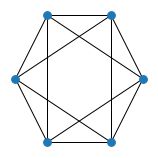

In [9]:
# Laplacian for Square Matrix
def Laplacian(A):
    for i in range(len(A)):
        A[i,i] = -np.sum(A[i,:])    
    return -A

# Create a Network and Check its properties
N = 6
A = RingLattice(N, 2)
AG = nx.from_numpy_array(A)
print('Connected :', nx.is_connected(AG))
L = Laplacian(A)

plt.figure(figsize=(2,2))
nx.draw(AG, nx.circular_layout(AG), node_size=60)
plt.show()

The critical coupling value is analytically found to be $\alpha_c=\frac{\Gamma(f,h)}{\lambda_2}$. If $H=I$, this can be written as $\frac{\Lambda}{\lambda_2}$ where $\Lambda$ is the Lyapunov exponent of the isolated dynamics.

In [10]:
Eigen2 = np.sort(la.eigvals(L))[1]
print('2nd Eigenvalue :',Eigen2)
Lyapunov = .93
print('Alpha critical :', Lyapunov/Eigen2)

2nd Eigenvalue : 3.9999999999999996
Alpha critical : 0.23250000000000004


We can now describe the coupled dynamics with a system of dimension 3N and numerically integrate the trajectories using Runge-Kutta Methods:

In [11]:
def MultiLorenz(y, N):  
    dy = np.zeros(shape=(N,3))
    for i in np.arange(N):
        dy[i,0] = sigma*(y[i,1]-y[i,0])      
        dy[i,1] = y[i,0]*(rho- y[i,2])- y[i,1]   
        dy[i,2] = y[i,0]*y[i,1] - beta*y[i,2]  
    return dy

def NetworkDynamics(x):
    Hu = np.array([list(map(lambda l: H.dot(l), x[np.arange(N)]))]).squeeze()
    return MultiLorenz(x,N) - alpha*L.dot(Hu)

def rk4s(f,h,x,params):
    k1 = h*f(x,*params)
    k2 = h*f(x+0.5*k1,*params)
    k3 = h*f(x+0.5*k2,*params)
    k4 = h*f(x+k3,*params)
    x += (k1+2*k2+2*k3+k4)/6
    return x

Setting up the parameters and plotting coupled dynamics:

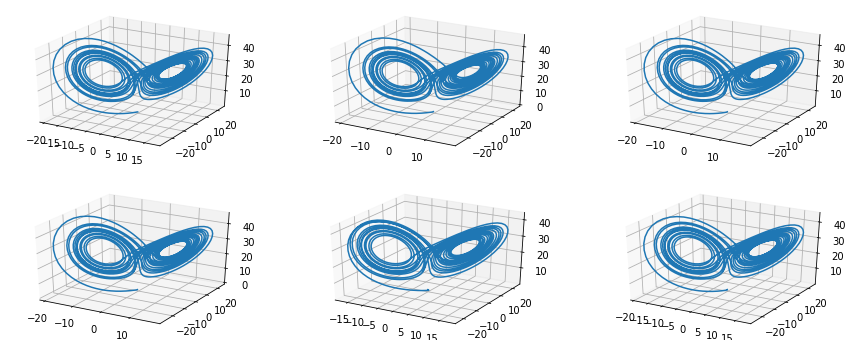

In [12]:
Dim = 3 
H = np.eye(Dim)

# Chaotic parameters for Lorenz
sigma, rho, beta = 10, 28, 2.667 
         
# Coupling Strength
alpha = .26
            
# Set timeline
t_init = 0
t_step = .01
steps = 2000
t_final = t_init + t_step * steps
timeline = np.arange(t_init,t_final,t_step)

x = np.zeros([N, Dim, steps])
x[:,:,0] = np.random.uniform(-0.5,0.5,[N,Dim])
for i in range(steps-1):
    x[:,:,i+1] = rk4s(NetworkDynamics, t_step ,x[:,:,i],())

plt.figure(figsize=(15,6))
plt.subplot(231, projection='3d')
plt.plot(x[0,0,:],x[0,1,:],x[0,2,:])
plt.subplot(232, projection='3d')
plt.plot(x[1,0,:],x[1,1,:],x[1,2,:])
plt.subplot(233, projection='3d')
plt.plot(x[2,0,:],x[2,1,:],x[2,2,:])
plt.subplot(234, projection='3d')
plt.plot(x[3,0,:],x[3,1,:],x[3,2,:])
plt.subplot(235, projection='3d')
plt.plot(x[4,0,:],x[4,1,:],x[4,2,:])
plt.subplot(236, projection='3d')
plt.plot(x[5,0,:],x[5,1,:],x[5,2,:])
plt.show()

We can define the Synchronization Error of N Coupled Lorenz systems as :<br>
\begin{aligned}
E=\frac{2}{3N(N-1)} \sum_{d=1}^{3} \sum_{j<i, i=1}^N |x_{id}-x_{jd}|
\end{aligned}

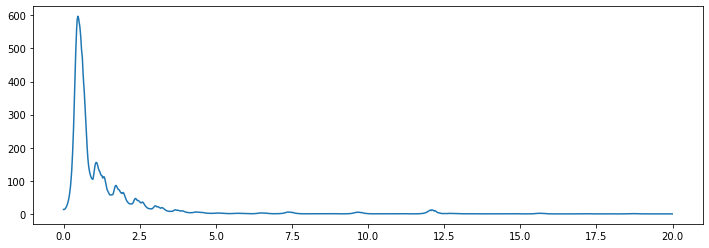

In [13]:
SyncError = np.zeros(steps)
for t in range(steps):
    for i in range(N):
        for j in range(i):
            for k in range(Dim):
                SyncError[t] += abs(x[i,k,t] - x[j,k,t])
                
plt.figure(figsize=(12,4))
plt.plot(timeline, SyncError)
plt.show()      